<a href="https://colab.research.google.com/github/guiebitt/cddeeplearning/blob/master/exercicio01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definição do problema

- Equação para conversão de T(°F) - T(°C) ^ 9/5 + 32

# Etapa 01: Importação das bibliotecas

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.5.0'

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Etapa 02: Importação dos dados

In [5]:
temperature_df = pd.read_csv('/Celsius-to-Fahrenheit.csv')
temperature_df.reset_index(drop = True, inplace = True)

In [6]:
temperature_df

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0
5,-9,15.8
6,-8,17.6
7,-7,19.4
8,-6,21.2
9,-5,23.0


In [7]:
temperature_df.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [9]:
temperature_df.tail(10)

,Celsius,Fahrenheit
20,6,42.8
21,7,44.6
22,8,46.4
23,9,48.2
24,10,50.0
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


In [10]:
temperature_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


# Etapa 03: Visualização de Dados

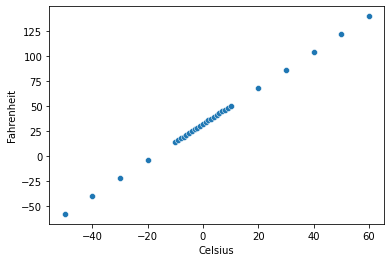

In [12]:
sns.scatterplot(x = temperature_df['Celsius'], y = temperature_df['Fahrenheit']);

# Etapa 04: Configuração da base de dados de treinamento

In [13]:
x_train = temperature_df['Celsius']
y_train = temperature_df['Fahrenheit']

x_train.shape

(30,)

# Etapa 05: Construção do modelo

In [14]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=2, input_shape = [1]))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss="mean_squared_error")

In [20]:
epochs_hist = model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0041
Epoch 2/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 3/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0040
Epoch 4/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0039
Epoch 5/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 6/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 7/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0036
Epoch 8/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0035
Epoch 9/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0035
Epoch 10/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0034
Epoch 11/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0033
Epoch 12/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 13/1000
1/1 [==============================

In [21]:
epochs_hist.history.keys()

dict_keys(['loss'])

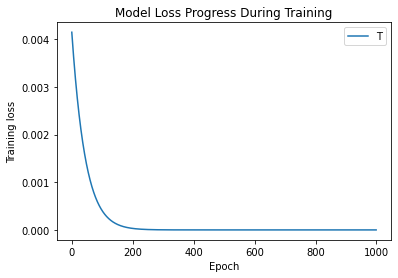

In [23]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend('Training loss')

In [24]:
model.get_weights()

[array([[1.8000002, 1.8000002]], dtype=float32),
 array([31.999952, 31.999952], dtype=float32)]

In [26]:
temp_c = 10
temp_f = model.predict([temp_c])
temp_f

array([[49.999954, 49.999954]], dtype=float32)

In [28]:
temp_f1 = 9/5 * temp_c + 32
temp_f1

50.0